In [2]:
# How to set up juypter notebook
# https://www.youtube.com/watch?v=HLD-Ll_-IT4&t=153s

In [ ]:
import pandas as pd
import os

In [4]:
base_path = os.getcwd()
df = pd.read_csv(base_path + "/OER-Data.csv")

In [5]:
df

,report_refresh_date,tenant_display_name,user_id,last_activity_date,team_chat_message_count,private_chat_message_count,call_count,meeting_count,post_messages,reply_messages,...,scheduled_one_time_meetings_attended_count,scheduled_recurring_meetings_organized_count,scheduled_recurring_meetings_attended_count,audio_duration,video_duration,screen_share_duration,audio_duration_in_seconds,video_duration_in_seconds,screen_share_duration_in_seconds,has_other_action
0,2023-11-16,serranojoseph@example.org,3cae6678-c44f-4cf0-b507-fc1d8c7d2477,2023-11-16,0,0,0,0,0,0,...,0,0,0,PT0S,PT0S,PT0S,0,0,0,Yes
1,2023-11-16,hmckinney@example.org,798bca91-b8d6-4ac6-8109-39bae470d23f,2023-11-16,4,43,1,1,4,0,...,0,0,0,PT40M5S,PT39M56S,PT0S,2405,2396,0,No
2,2023-11-16,dwaters@example.org,16f4f77e-e970-43b6-bccf-3bbce3c37b99,2023-11-16,0,0,0,0,0,0,...,0,0,0,PT0S,PT0S,PT0S,0,0,0,Yes
3,2023-11-16,armstrongbryan@example.net,544fa54c-1d73-482f-9419-d6c530051a40,2023-11-16,3,25,0,0,0,3,...,0,0,0,PT0S,PT0S,PT0S,0,0,0,No
4,2023-11-16,canthony@example.com,5e0bb2a1-20d0-46e7-8b9c-7f490c24a74c,2023-11-16,0,0,0,0,0,0,...,0,0,0,PT0S,PT0S,PT0S,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2526,2023-12-01,oroberts@example.org,45f9133f-79dc-4342-bff3-99b932118a3e,2023-12-01,3,0,0,2,0,3,...,0,0,1,PT1H2M46S,PT1H2M46S,PT51M29S,3766,3766,3089,No
2527,2023-12-01,powelljennifer@example.com,ad1033fd-a7dc-4236-9af9-770248c30945,2023-12-01,0,1,0,0,0,0,...,0,0,0,PT0S,PT0S,PT0S,0,0,0,No
2528,2023-12-01,paulmartinez@example.com,a368052a-b608-4bc8-82a7-75163f92d7ee,2023-12-01,1,0,0,0,1,0,...,0,0,0,PT0S,PT0S,PT0S,0,0,0,No
2529,2023-12-01,jonesjoseph@example.com,3da37f32-c5f0-4608-b797-b1148390a626,2023-12-01,0,0,0,0,0,0,...,0,0,0,PT0S,PT0S,PT0S,0,0,0,Yes


In [6]:
pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


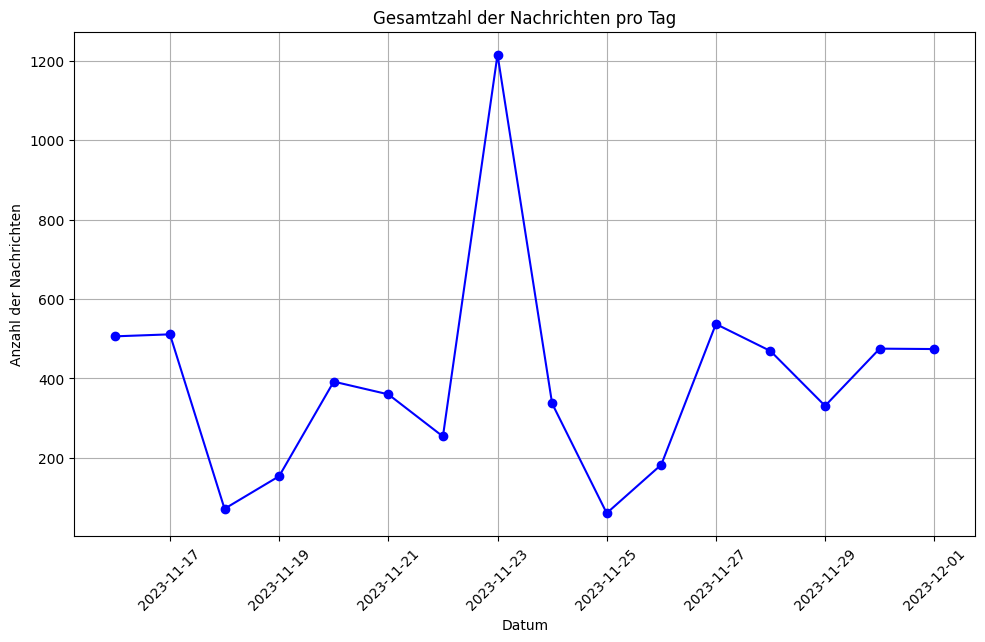

In [7]:
import matplotlib.pyplot as plt

# Convert date columns to datetime
df['report_refresh_date'] = pd.to_datetime(df['report_refresh_date'])

# Calculate the total number of messages (team chat and private chat) per day
df['total_messages'] = df['team_chat_message_count'] + df['private_chat_message_count']

# Aggregate the data to get the total number of messages per day
aggregated_data = df.groupby('report_refresh_date')['total_messages'].sum().reset_index()

# Visualize the total number of messages per day
plt.figure(figsize=(10, 6))
plt.plot(aggregated_data['report_refresh_date'], aggregated_data['total_messages'], marker='o', linestyle='-', color='blue')
plt.title('Gesamtzahl der Nachrichten pro Tag')
plt.xlabel('Datum')
plt.ylabel('Anzahl der Nachrichten')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

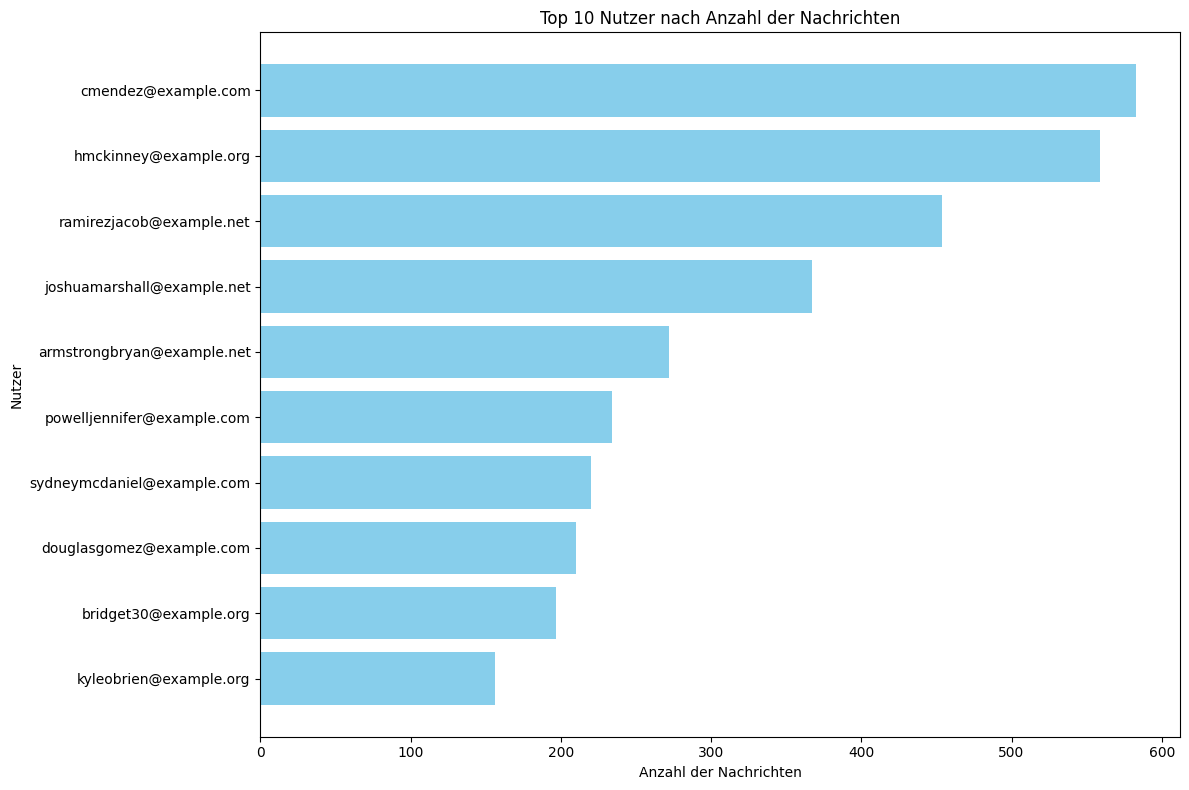

In [8]:
# Recalculate the total number of messages for each user
user_messages_sum = df.groupby('tenant_display_name')['total_messages'].sum().reset_index()

# Sort users by the total number of their messages and keep the top 10
top_10_users_messages = user_messages_sum.sort_values(by='total_messages', ascending=False).head(10)

# Visualize the 10 users with the highest number of messages
plt.figure(figsize=(12, 8))
plt.barh(top_10_users_messages['tenant_display_name'], top_10_users_messages['total_messages'], color='skyblue')
plt.xlabel('Anzahl der Nachrichten')
plt.ylabel('Nutzer')
plt.title('Top 10 Nutzer nach Anzahl der Nachrichten')
plt.tight_layout()
plt.gca().invert_yaxis()  # Reverse the order so that the user with the most messages is at the top
plt.show()


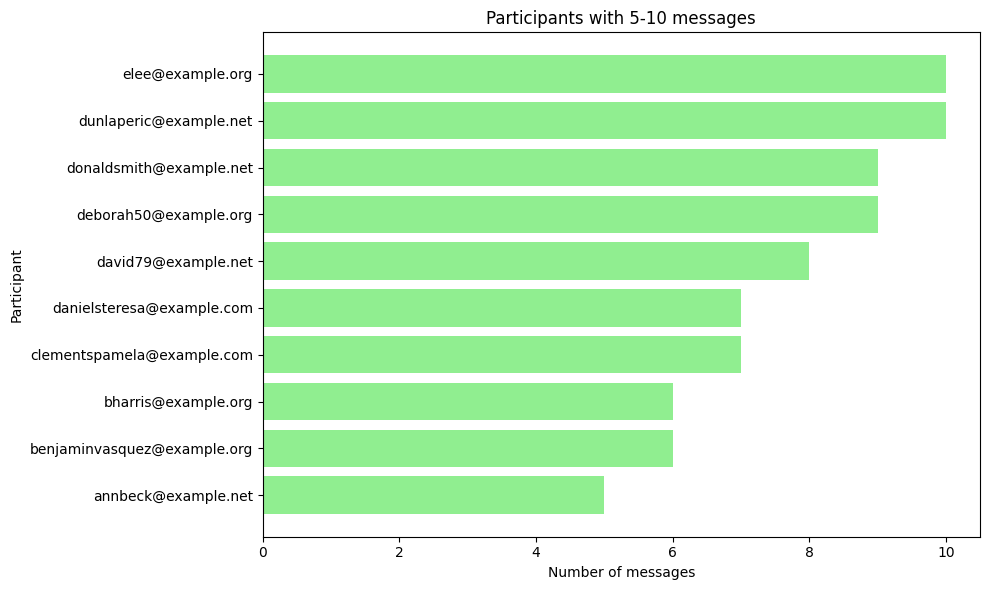

In [9]:
# Show the participants who have written a total of 5-10 messages. Limit the view to 10 people.
messages_between_5_and_10 = user_messages_sum[(user_messages_sum['total_messages'] >= 5) & (user_messages_sum['total_messages'] <= 10)].head(10)
sorted_messages_between_5_and_10 = messages_between_5_and_10.sort_values(by='total_messages', ascending=True)

# Visualize the participants with 5-10 messages
plt.figure(figsize=(10, 6))
plt.barh(messages_between_5_and_10['tenant_display_name'], sorted_messages_between_5_and_10['total_messages'], color='lightgreen')
plt.xlabel('Number of messages')
plt.ylabel('Participant')
plt.title('Participants with 5-10 messages')
plt.tight_layout()
plt.show()

In [ ]:
# Ask the Conversational Agen (ChatGPT) questions about your data.
# https://www.youtube.com/watch?v=2izXQUoXyjA&t=91s